In [18]:
# !pip install selenium

In [19]:
from bs4 import BeautifulSoup as bsoup
from fuzzywuzzy import process
import requests
import matplotlib.pyplot as plt
from collections import OrderedDict
# from selenium import webdriver

In [6]:
zack_url = "https://scholar.google.com/citations?user=X7FY3wUAAAAJ&hl=en&oi=ao"
hinton_url = "https://scholar.google.com/citations?user=JicYPdAAAAAJ&hl=en&oi=ao"

In [14]:
base_url = hinton_url
content = requests.get(base_url).text
page = bsoup(content)

In [16]:
def get_waterfall_string(waterfall_count):
    if waterfall_count == 0:
        return "%cstart=20&pagesize=80"
    if waterfall_count == 1:
        return "%cstart=100&pagesize=100"
    return f"%cstart={waterfall_count * 100}&pagesize={(waterfall_count-1) * 100}"

In [ ]:
waterfall_count = 0

while True:
    try:
        get_waterfall_string(waterfall_count)
        
    except ValueError:
        print "Oops!  That was not a valid number.  Try again..."
    else:
        print 'Thanks,',x,'is indeed an integer'
        break

print 'all done, bye'

In [5]:
page_title = page.find('title').string
author_name = page_title.split(' - ')[0]
author_name

'Zachary F. M. Burton'

In [6]:
# get titles of all papers on first page
results = []
for entry in page.find_all("a", attrs={"class": "gsc_a_at"}):
    results.append({"title":entry.text, "authors":None})

In [7]:
len(results)

17

In [8]:
for r in results[:3]: print(r)

{'title': 'Unraveling petroleum degradation, maturity, and mixing and addressing impact on petroleum prospectivity: Insights from frontier exploration regions in New Zealand', 'authors': None}
{'title': 'Interpretation of source rock depositional environment and age from seep oil, east coast of New Zealand', 'authors': None}
{'title': 'Salty Solution to Slipping Soils on Martian Slopes', 'authors': None}


In [9]:
# get authors of each paper
authors_journals = []
for auth in page.find_all("div", attrs={"class": "gs_gray"}):
    authors_journals.append(auth.text)
    
# remove extra gs_gray classes found (the journal names)
authors = [text for i,text in enumerate(authors_journals) if i%2==0]

In [10]:
len(authors)

17

In [11]:
authors[:3]

['ZFM Burton, JM Moldowan, R Sykes, SA Graham',
 'ZFM Burton, JM Moldowan, LB Magoon, R Sykes, SA Graham',
 'JL Bishop, JD Toner, P Englert, VC Gulick, AS McEwen, ZFM Burton, ...']

In [73]:
# get author position counts
author_name = 'Zachary F. M. Burton'
author_positions = {}

author_lists = [names.split(', ') for names in authors]

for names in author_lists:
    match = process.extractOne(author_name, names)[0]
    
    for i, author in enumerate(names):
        
        if author == match:
            if str(i+1) in author_positions:
                author_positions[str(i+1)] += 1
            else:
                author_positions[str(i+1)] = 1
            break
            
author_positions 

{'1': 11, '6': 2, '3': 2, '2': 2}

In [78]:
author_positions = OrderedDict(sorted(author_positions.items()))

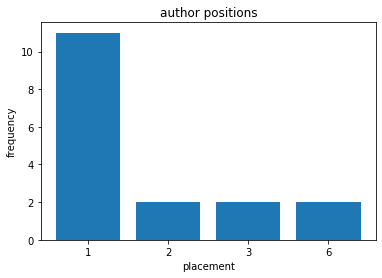

In [83]:
plt.bar(list(author_positions.keys()), list(author_positions.values()))
plt.title("author positions")
plt.xlabel("placement")
plt.ylabel("frequency");